<a href="https://colab.research.google.com/github/arezyhs/Python-Digital-Image-Processing-Projects/blob/main/Digital-Image-Processing-Projects-Skew-Detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving F921G4IIJX58MRB.LARGE_.jpg to F921G4IIJX58MRB.LARGE_.jpg


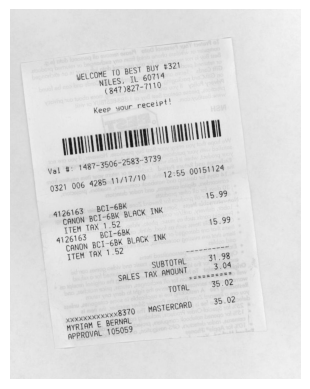

In [1]:
from google.colab import files
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Mengunggah gambar
uploaded = files.upload()

# Mendapatkan nama file gambar yang diunggah
image = next(iter(uploaded))  # Mendapatkan nama file yang pertama kali diunggah

# Membaca gambar
img = imread(image)

# Mengecek apakah gambar memiliki 3 channel (RGB atau RGBA)
if len(img.shape) == 3 and img.shape[2] == 4:
    # Jika gambar memiliki channel alpha (RGBA), hapus channel tersebut
    img = img[:, :, :3]

# Mengecek apakah gambar sudah dalam format grayscale (2D array)
if len(img.shape) == 2:
    # Gambar sudah dalam format grayscale, tidak perlu diubah
    grayscale_img = img
else:
    # Jika gambar dalam format RGB, ubah menjadi grayscale
    grayscale_img = rgb2gray(img)

# Menampilkan gambar dalam format grayscale
plt.imshow(grayscale_img, cmap="gray")
plt.axis('off')  # sumbu off
plt.show()

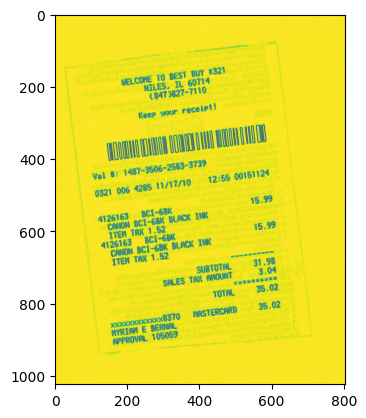

In [2]:
from skimage.filters import sobel
from skimage.util import invert

sobel_image = invert(sobel(img))
plt.imshow(sobel_image)

# Check if the image has 3 channels (RGB or RGBA)
if len(sobel_image.shape) == 3:
    sobel_image = rgb2gray(sobel_image)  # Convert to grayscale


In [3]:
import numpy as np
from skimage.transform import rotate

#find the horizontal projection of all the rows in the image
#rotate the image between angles -10 to 10 degrees and find the angle which gives the least median of horizontal projection
def horizontal_projections(sobel_image):
    sum_of_cols = []
    rows, cols = sobel_image.shape  # This will now work because sobel_image is 2D
    for row in range(rows-1):
        sum_of_cols.append(np.sum(sobel_image[row,:]))
    return sum_of_cols

### horizontal projections on line plot

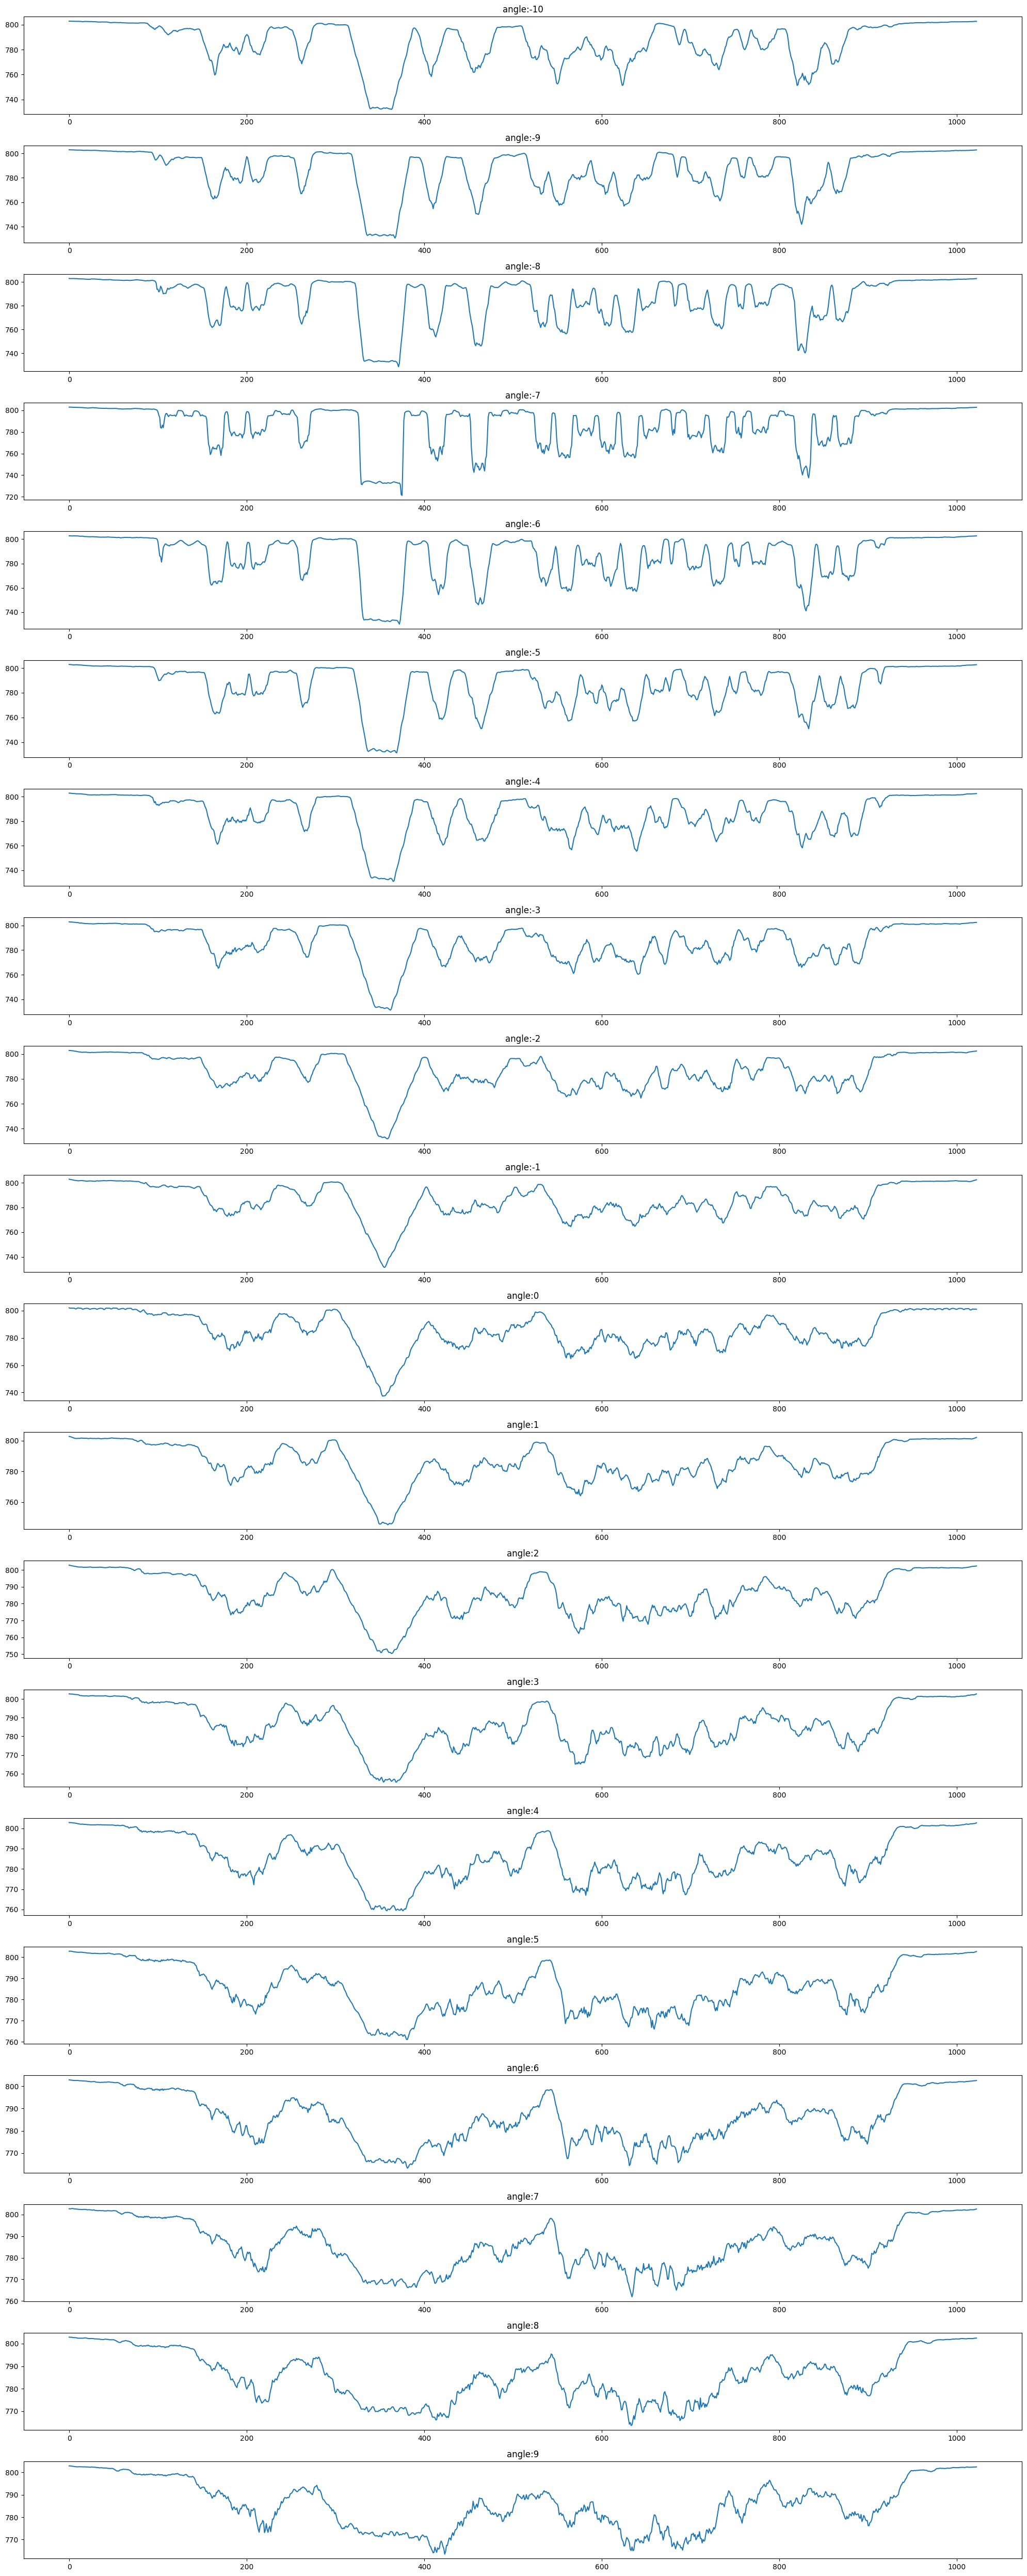

In [4]:
# Set up the subplots
fig, ax = plt.subplots(nrows=20, figsize=(20,50))

# Loop through different angles and plot horizontal projections
for index, angle in enumerate(range(-10, 10)):
    ax[index].set_title('angle:' + str(angle))
    rotated_image = rotate(sobel_image, angle, cval=1)
    hp = horizontal_projections(rotated_image)  # Get horizontal projections for the rotated image
    xv = []
    yv = []
    for i, y in enumerate(hp):
        xv.append(i)
        yv.append(y)
    ax[index].plot(yv)

plt.tight_layout()
plt.show()

### box plot of these horizontal projections

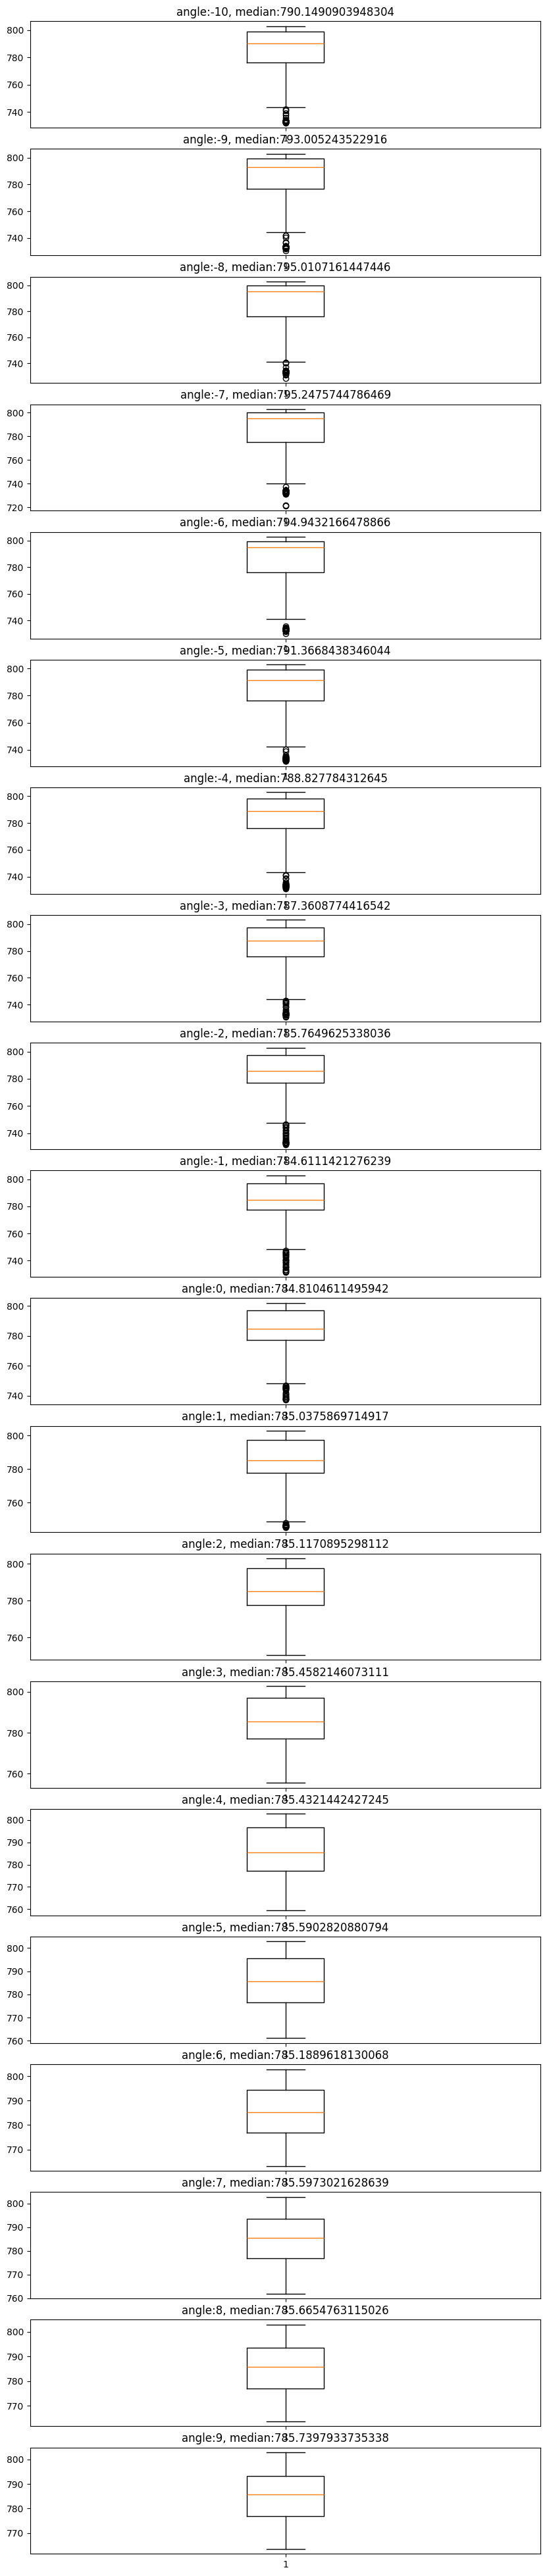

In [5]:
fig, ax = plt.subplots(nrows=20, figsize=(10,50))
for index,angle in enumerate(range(-10,10)):
  hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
  xv = []
  yv = []
  for i, y in enumerate(hp):
    xv.append(i)
    yv.append(y)
  ax[index].set_title('angle:'+str(angle)+', median:'+str(np.median(hp)))
  ax[index].boxplot(yv)

### extract the angle which gave me the highest median.

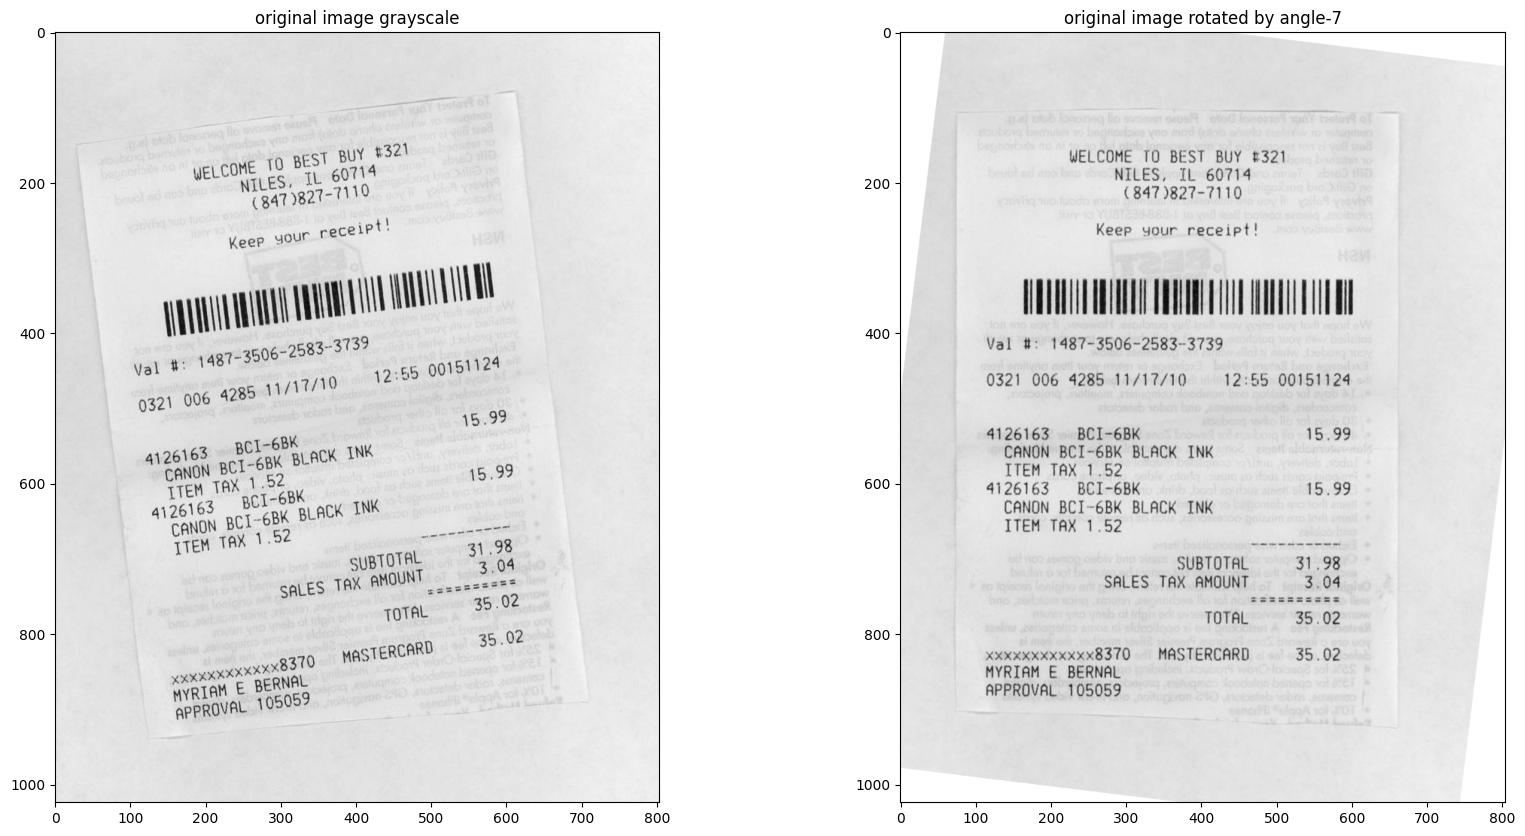

In [6]:
rows,cols = sobel_image.shape
predicted_angle = 0
highest_hp = 0
for index,angle in enumerate(range(-10,10)):
  hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
  median_hp = np.median(hp)
  if highest_hp < median_hp:
    predicted_angle = angle
    highest_hp = median_hp

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_title('original image grayscale')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('original image rotated by angle'+str(predicted_angle))
ax[1].imshow(rotate(img, predicted_angle, cval=1), cmap="gray")